#### Ref: [VGG16学习笔记](http://deanhan.com/2018/07/26/vgg16/)

In [1]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""

'\nSpyder Editor\n\nThis is a temporary script file.\n'

In [2]:
import matplotlib.pyplot as plt

# 因為採用anaconda的env安裝tensorflow, 因此不能使用
# from tf.keras import xxxx
# 要改用
# from tensorflow.python.keras import xxxx
from tensorflow.python.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.applications.vgg16 import preprocess_input, decode_predictions

import numpy as np

In [3]:
def percent(value):
    return '%.2f%%' % (value * 100)

In [4]:
# include_top=True，表示會載入完整的 VGG16 模型，包括加在最後3層的卷積層
# include_top=False，表示會載入 VGG16 的模型，不包括加在最後3層的卷積層，通常是取得 Features
# 若下載失敗，請先刪除 c:\<使用者>\.keras\models\vgg16_weights_tf_dim_ordering_tf_kernels.h5
model = VGG16(weights='imagenet', include_top=True)

In [5]:
# Input：要辨識的影像
img_path = r'imgs/'
img_name = 'brain.jpg'

# 讀取檔案并转化为224*224的标准尺寸
img = image.load_img(img_path+img_name, target_size=(224, 224))

(224, 224, 3)
[[255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255.]]


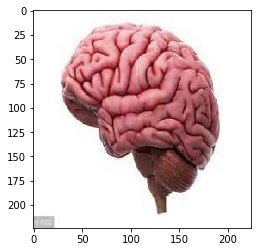

In [6]:
# 轉為浮點數
x = image.img_to_array(img)
print(x.shape)
print(x[:5, :5,0])

plt.imshow(x/255)

In [7]:
# 转化为张量size为(1, 224, 224, 3)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [8]:
# 預測，取得features，維度為 (1,1000)
features = model.predict(x)

In [9]:
# 取得前五個最可能的類別及機率
pred=decode_predictions(features, top=5)[0]

In [10]:
#整理预测结果,value
values = []
bar_label = []
for element in pred:
    values.append(element[2])
    bar_label.append(element[1])

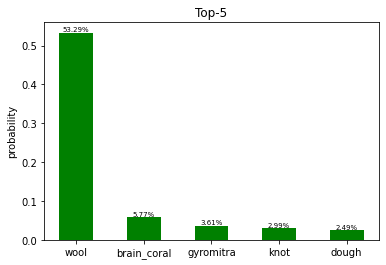

In [11]:
fig=plt.figure(u"Top-5 预测结果")
ax = fig.add_subplot(111) 
ax.bar(range(len(values)), values, tick_label=bar_label, width=0.5, fc='g')
ax.set_ylabel(u'probability') 
ax.set_title(u'Top-5') 
for a,b in zip(range(len(values)), values):
    ax.text(a, b+0.0005, percent(b), ha='center', va = 'bottom', fontsize=7)

fig = plt.gcf()
plt.show()

# name=img_path[0:-4]+'_pred'
# fig.savefig(name, dpi=200)

In [12]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

---
---

#### Pytorch 

In [30]:
import torch
import numpy as np

In [31]:
torch.tensor([[1, 2], [3, 4], [5, 6]])

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [32]:
# 可使用 dtype 來設定數據類型
torch.tensor([[1, 2], [3, 4], [5, 6]], dtype=torch.float64)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]], dtype=torch.float64)

In [33]:
# 建立全為 0 的張量
torch.zeros([2, 2])

tensor([[0., 0.],
        [0., 0.]])

In [34]:
# 建立全為 1 的張量
torch.ones([2, 2])

tensor([[1., 1.],
        [1., 1.]])

In [36]:
# 由於在訓練模型的時候，常常會使用 GPU 來提升訓練速度，因此可藉由 torch.device 設定分配的設備。
if torch.cuda.is_available():
    print('cuda is available')
    cuda0 = torch.device('cuda:0')
    t1 = torch.tensor([[1, 2], [3, 4], [5, 6]], dtype=torch.float64, device=cuda0)

cuda is available


In [39]:
# 使用 CPU
cpu = torch.device('cpu')

In [45]:
# Tensor 轉換成 numpy 的用法
numpy1 = t1.cpu()
print('numpy1:', numpy1)
print('type:', type(numpy1))
print('tpye:', type(t1))


numpy1: tensor([[1., 2.],
        [3., 4.],
        [5., 6.]], dtype=torch.float64)
type: <class 'torch.Tensor'>
tpye: <class 'torch.Tensor'>


In [46]:
# numpy 轉換成Tensor的用法, 有四種方式但為了保險建議統一用torch.tensor(np_array) (深拷貝:另闢內存放資料, 使用numpy預設資料格式)
numpy2 = np.array([[1, 2, 3], [4, 5, 6]])
print(type(numpy2), type(numpy2[0,0]))
tensor1 = torch.tensor(numpy2)
print('dtype:', tensor1.dtype)

<class 'numpy.ndarray'> <class 'numpy.int32'>
dtype: torch.int32
